# CAS_Project - Contribution HUC

Goal: Regression Covid-Cases per 100'000 / GDP AND Regression Covid-Death per 100'000 / GDP

To Do: 
Regression for a single country. E.g. Covid19_Germany_"Death per 100k" and DAX


- India
- Brasil
- France
- USA
- Canada
- Japan
- China (Index: Shanghai)
- Germany




Used Modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from numpy import cov
#from urllib.request import urlopen
#from sklearn import datasets



## Import Data

### Covid Data


In [2]:
# csv der Coviddaten einlesen

df_Covid19 = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/112XdQsa') # https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases
df_Covid19.head(3) #test

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,23/09/2020,23,9,2020,71,2,Afghanistan,AF,AFG,38041757.0,Asia,1.642931
1,22/09/2020,22,9,2020,30,3,Afghanistan,AF,AFG,38041757.0,Asia,1.524640
2,21/09/2020,21,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.698134


In [3]:
df_Covid19.shape

(44554, 12)

In [4]:
df_Covid19.info

<bound method DataFrame.info of           dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      23/09/2020   23      9  2020     71       2             Afghanistan   
1      22/09/2020   22      9  2020     30       3             Afghanistan   
2      21/09/2020   21      9  2020      0       0             Afghanistan   
3      20/09/2020   20      9  2020    125       4             Afghanistan   
4      19/09/2020   19      9  2020     47       1             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
44549  25/03/2020   25      3  2020      0       0                Zimbabwe   
44550  24/03/2020   24      3  2020      0       1                Zimbabwe   
44551  23/03/2020   23      3  2020      0       0                Zimbabwe   
44552  22/03/2020   22      3  2020      1       0                Zimbabwe   
44553  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCod

In [5]:
df_Covid19_isNaN = df_Covid19.isnull()


row_has_NaN = df_Covid19_isNaN.any(axis=1)
rows_with_NaN = df_Covid19[row_has_NaN]
print(rows_with_NaN)


          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
245    12/01/2020   12      1  2020      0       0             Afghanistan   
246    11/01/2020   11      1  2020      0       0             Afghanistan   
247    10/01/2020   10      1  2020      0       0             Afghanistan   
248    09/01/2020    9      1  2020      0       0             Afghanistan   
249    08/01/2020    8      1  2020      0       0             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
44549  25/03/2020   25      3  2020      0       0                Zimbabwe   
44550  24/03/2020   24      3  2020      0       1                Zimbabwe   
44551  23/03/2020   23      3  2020      0       0                Zimbabwe   
44552  22/03/2020   22      3  2020      1       0                Zimbabwe   
44553  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
2

In [6]:
df_Covid19=df_Covid19.rename(columns={'dateRep': 'Date', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'cases(14days)/100k'})
df_Covid19['Date'] = pd.to_datetime(df_Covid19['Date'],dayfirst=True) # necessary? When date leq 12 -> display of date (combination month, day) is incorrect... fixed
df_Covid19.head(3)

,Date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,cases(14days)/100k
0,2020-09-23,23,9,2020,71,2,Afghanistan,AF,AFG,38041757.0,Asia,1.642931
1,2020-09-22,22,9,2020,30,3,Afghanistan,AF,AFG,38041757.0,Asia,1.524640
2,2020-09-21,21,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.698134


In [7]:
#Select rows for selected countries and coloumns date, cases, deaths, Cummulative Nuber per 100k....
df_Covid_Selection = df_Covid19[df_Covid19['countriesAndTerritories'].isin(['India', 'Brazil','France','United_States_of_America','Canada','Japan','China','Germany'])]
df_Covid_Selection.shape

(2143, 12)

In [8]:
df_Covid_Selection=df_Covid_Selection[['Date','cases','deaths','countriesAndTerritories', 'cases(14days)/100k']]

In [9]:
# Change the NaN in Cases per 100k to 0 for further computing
df_Covid_Selection['cases(14days)/100k'] = df_Covid_Selection['cases(14days)/100k'].fillna(0) 

In [10]:
df_Covid_Selection.sort_index()
df_Covid_Selection.head(3)

,Date,cases,deaths,countriesAndTerritories,cases(14days)/100k
5777,2020-09-23,33536,836,Brazil,203.521430
5778,2020-09-22,13439,377,Brazil,194.397032
5779,2020-09-21,16389,363,Brazil,192.896910


In [11]:
df_Covid_Brazil = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Brazil'])]
df_Covid_Brazil = df_Covid_Brazil[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Brazil = df_Covid_Brazil.rename(columns={'cases': 'cases_Brazil', 'deaths': 'deaths_Brazil', 'cases(14days)/100k' :'cases(14days)/100k_Brazil'})

df_Covid_Brazil

,Date,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil
5777,2020-09-23,33536,836,203.521430
5778,2020-09-22,13439,377,194.397032
5779,2020-09-21,16389,363,192.896910
5780,2020-09-20,33057,739,192.011809
5781,2020-09-19,39797,858,190.642936
...,...,...,...,...
6040,2020-01-04,0,0,0.000000
6041,2020-01-03,0,0,0.000000
6042,2020-01-02,0,0,0.000000
6043,2020-01-01,0,0,0.000000


In [12]:
df_Covid_Canada = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Canada'])]
df_Covid_Canada = df_Covid_Canada[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Canada = df_Covid_Canada.rename(columns={'cases': 'cases_Canada', 'deaths': 'deaths_Canada', 'cases(14days)/100k' :'cases(14days)/100k_Canada'})

In [13]:
df_Covid_Canada.head(3)

,Date,cases_Canada,deaths_Canada,cases(14days)/100k_Canada
7446,2020-09-23,1248,6,34.521897
7447,2020-09-22,1766,11,35.478834
7448,2020-09-21,875,6,31.418535


In [14]:
df_Covid_China = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['China'])]
df_Covid_China = df_Covid_China[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_China = df_Covid_China.rename(columns={'cases': 'cases_China', 'deaths': 'deaths_China', 'cases(14days)/100k' :'cases(14days)/100k_China'})

df_Covid_France = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['France'])]
df_Covid_France = df_Covid_France[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_France = df_Covid_France.rename(columns={'cases': 'cases_France', 'deaths': 'deaths_France', 'cases(14days)/100k' :'cases(14days)/100k_France'})

df_Covid_Germany = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Germany'])]
df_Covid_Germany =df_Covid_Germany[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Germany = df_Covid_Germany.rename(columns={'cases': 'cases_Germany', 'deaths': 'deaths_Germany', 'cases(14days)/100k' :'cases(14days)/100k_Germany'})

df_Covid_India = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['India'])]
df_Covid_India = df_Covid_India[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_India = df_Covid_India.rename(columns={'cases': 'cases_India', 'deaths': 'deaths_India', 'cases(14days)/100k' :'cases(14days)/100k_India'})

df_Covid_Japan = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Japan'])]
df_Covid_Japan = df_Covid_Japan[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Japan = df_Covid_Japan.rename(columns={'cases': 'cases_Japan', 'deaths': 'deaths_Japan', 'cases(14days)/100k' :'cases(14days)/100k_Japan'})

df_Covid_USA = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['United_States_of_America'])]
df_Covid_USA = df_Covid_USA[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_USA = df_Covid_USA.rename(columns={'cases': 'cases_USA', 'deaths': 'deaths_USA', 'cases(14days)/100k' :'cases(14days)/100k_USA'})




# Indices

In [15]:
#csv der Indices einlesen
df_BSESN = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^BSESN.csv') # BSESN Bombay Stock Ehange Sensitivity Index Composite --> India
df_BSESN['Name']='BSESN' 

df_BVSP = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^BVSP.csv') # BVSP Composite -> Brasil
df_BVSP['Name']='BVSP'

df_FCHI = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^FCHI.csv') # FCHI Composite -> France
df_FCHI['Name']='FCHI'

df_GSPC = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^GSPC.csv') # GSPC Composite -> USA
df_GSPC['Name']='GSPC'

df_GSPTE = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^GSPTSE.csv') # GSPTE Composite -> Canada
df_GSPTE['Name']='GSPTE'

df_N225 = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^N225.csv') # N225 Composite -> Japan
df_N225['Name']='N225'

#df_SSEC = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^SSEC.csv') # SSEC Composite -> China (Shanghai)
#df_SSEC['Name']='SSEC'
#Error on yahoo-finance-Site; only 1 row...


df_DAX = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/DAX.csv') # DAX Composite -> Germany
df_DAX['Name']='DAX'

In [16]:
df_DAX.shape

(254, 8)

In [17]:
#Select coloumns for DAX ....
df_DAX.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
251,2020-09-21,28.230000,28.230000,27.503000,27.799999,27.799999,47700,DAX
252,2020-09-22,27.860001,28.027000,27.590000,27.934000,27.934000,5300,DAX
253,2020-09-23,27.860001,27.860001,27.787399,27.559999,27.559999,1663,DAX


In [18]:
df_DAX=df_DAX.rename(columns={'Open': 'Open_DAX', 'High': 'High_DAX', 'Low': 'Low_DAX', 'Close':'Close_DAX', 'Adj Close': 'Adj Close_DAX', 'Volume': 'Volume_DAX'})

In [19]:
df_DAX  = df_DAX[['Date','Adj Close_DAX']]
df_DAX.shape

(254, 2)

In [20]:
df_DAX['Date'] = pd.to_datetime(df_DAX['Date'])
df_DAX.set_index('Date').sort_index()

,Adj Close_DAX
Date,
2019-09-23,25.380625
2019-09-24,25.453772
2019-09-25,25.137453
2019-09-26,25.345037
2019-09-27,25.330210
...,...
2020-09-17,29.309999
2020-09-18,29.101999
2020-09-21,27.799999


In [21]:
df_BSESN=df_BSESN.rename(columns={'Open': 'Open_BSESN', 'High': 'High_BSESN', 'Low': 'Low_BSESN', 'Close':'Close_BSESN', 'Adj Close': 'Adj Close_BSESN', 'Volume': 'Volume_BSESN'})
df_BSESN  = df_BSESN[['Date','Adj Close_BSESN']]
df_BSESN['Date'] = pd.to_datetime(df_BSESN['Date'])
df_BSESN.set_index('Date').sort_index()

df_BVSP=df_BVSP.rename(columns={'Open': 'Open_BVSP', 'High': 'High_BVSP', 'Low': 'Low_BVSP', 'Close':'Close_BVSP', 'Adj Close': 'Adj Close_BVSP', 'Volume': 'Volume_BVSP'})
df_BVSP  = df_BVSP[['Date','Adj Close_BVSP']]
df_BVSP['Date'] = pd.to_datetime(df_BVSP['Date'])
df_BVSP.set_index('Date').sort_index()

df_FCHI=df_FCHI.rename(columns={'Open': 'Open_FCHI', 'High': 'High_FCHI', 'Low': 'Low_FCHI', 'Close':'Close_FCHI', 'Adj Close': 'Adj Close_FCHI', 'Volume': 'Volume_FCHI'})
df_FCHI  = df_FCHI[['Date','Adj Close_FCHI']]
df_FCHI['Date'] = pd.to_datetime(df_FCHI['Date'])
df_FCHI.set_index('Date').sort_index()

df_GSPC=df_GSPC.rename(columns={'Open': 'Open_GSPC', 'High': 'High_GSPC', 'Low': 'Low_GSPC', 'Close':'Close_GSPC', 'Adj Close': 'Adj Close_GSPC', 'Volume': 'Volume_GSPC'})
df_GSPC  = df_GSPC[['Date','Adj Close_GSPC']]
df_GSPC['Date'] = pd.to_datetime(df_GSPC['Date'])
df_GSPC.set_index('Date').sort_index()


df_GSPTE=df_GSPTE.rename(columns={'Open': 'Open_GSPTE', 'High': 'High_GSPTE', 'Low': 'Low_GSPTE', 'Close':'Close_GSPTE', 'Adj Close': 'Adj Close_GSPTE', 'Volume': 'Volume_GSPTE'})
df_GSPTE  = df_GSPTE[['Date','Adj Close_GSPTE']]
df_GSPTE['Date'] = pd.to_datetime(df_GSPTE['Date'])
df_GSPTE.set_index('Date').sort_index()

df_N225=df_N225.rename(columns={'Open': 'Open_N225', 'High': 'High_N225', 'Low': 'Low_N225', 'Close':'Close_N225', 'Adj Close': 'Adj Close_N225', 'Volume': 'Volume_N225'})
df_N225  = df_N225[['Date','Adj Close_N225']]
df_N225['Date'] = pd.to_datetime(df_N225['Date'])
df_N225.set_index('Date').sort_index()


,Adj Close_N225
Date,
2019-09-24,22098.839844
2019-09-25,22020.150391
2019-09-26,22048.240234
2019-09-27,21878.900391
2019-09-30,21755.839844
...,...
2020-09-15,23454.890625
2020-09-16,23475.529297
2020-09-17,23319.369141


In [22]:
# As data for SSEC is faulty, drop from project
#df_SSEC = df_SSEC.rename(columns={'Open': 'Open_SSEC', 'High': 'High_SSEC', 'Low': 'Low_SSEC', 'Close':'Close_SSEC', 'Adj Close': 'Adj Close_SSEC', 'Volume': 'Volume_SSEC'})
#df_SSEC  = df_SSEC[['Date','Adj Close_SSEC']]
#df_SSEC['Date'] = pd.to_datetime(df_SSEC['Date'])
#df_SSEC.set_index('Date').sort_index()

# Combining Covid Data and Indices

In [23]:
## pd.merge combines two series resp. dataframes according to their index. However, it is cannot combine more than two dataframes. Thus, I chose an iterative way
df_Covid_Date=df_Covid_China[['Date',]]
df_Covid_Date # to create a date vector to merge the different data frames
df_Date=df_Covid_Date.set_index('Date').sort_index()
df_Date

""
Date
2019-12-31
2020-01-01
2020-01-02
2020-01-03
2020-01-04
...
2020-09-19
2020-09-20
2020-09-21


In [24]:
df_combined_Indices = pd.merge(df_Date, df_DAX, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_BSESN, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_BVSP, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_FCHI, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_GSPC, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_GSPTE, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Indices = pd.merge(df_combined_Indices, df_N225, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()

In [25]:
df_combined_Indices.shape

(340, 7)

In [26]:
df_combined_Indices.tail(6)

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
Date,,,,,,,
2020-09-18,29.101999,38845.820313,98290.000000,4978.180176,3319.469971,16199.000000,23360.300781
2020-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-21,27.799999,38034.140625,96991.000000,4792.040039,3281.060059,15981.799805,NaN
2020-09-22,27.934000,37734.078125,97294.000000,4772.839844,3315.570068,16142.900391,NaN
2020-09-23,27.559999,37668.421875,96780.421875,4802.259766,3296.469971,16039.019531,23346.490234


In [27]:
df_combined_Covid = pd.merge(df_Date, df_Covid_Brazil, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_Canada, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_China, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_France, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_Germany, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_India, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_Japan, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined_Covid = pd.merge(df_combined_Covid, df_Covid_USA, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()

In [28]:
df_combined_Covid.tail(10)

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-14,14768,415,221.817137,518,1,23.305956,29,0,0.021063,7183,...,21.650410,92071.0,1136.0,89.663794,439,3,6.142190,33871,378,158.879289
2020-09-15,15155,381,207.220562,1351,8,24.222798,22,1,0.021272,6158,...,21.878068,83809.0,1054.0,90.680174,301,9,5.964041,34841,451,159.180445
2020-09-16,36653,1113,204.374785,793,9,25.067468,24,1,0.021551,7852,...,22.654997,90123.0,1290.0,91.541258,490,10,5.870237,51473,1407,161.257239
2020-09-17,36820,987,199.582544,944,5,26.259630,7,0,0.020714,9784,...,23.718606,97894.0,1132.0,92.566640,561,12,5.841071,24598,865,156.955352
2020-09-18,36303,829,196.043091,1120,7,27.729784,44,0,0.021482,10593,...,24.276308,96424.0,1174.0,93.524107,485,9,5.696029,43567,831,159.179230
2020-09-19,39797,858,190.642936,1044,5,28.833736,14,1,0.020924,13215,...,25.383281,93337.0,1247.0,94.029443,579,13,5.673170,50209,956,158.917275
2020-09-20,33057,739,192.011809,863,6,30.148856,25,0,0.021482,13498,...,25.813302,92605.0,1133.0,94.173835,584,5,5.705489,40295,669,157.748813
2020-09-21,16389,363,192.896910,875,6,31.418535,36,0,0.021691,11569,...,25.943392,86961.0,1130.0,93.892735,0,0,5.361015,39852,251,160.574091
2020-09-22,13439,377,194.397032,1766,11,35.478834,12,0,0.021063,4298,...,26.331254,75083.0,1053.0,93.839603,781,8,5.678688,53153,372,169.357464


In [29]:
df_combined_Indices.tail(10)

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
Date,,,,,,,
2020-09-14,29.329000,38756.628906,100275.000000,5051.879883,3383.540039,16360.099609,23559.300781
2020-09-15,28.920000,39044.351563,100298.000000,5067.930176,3401.199951,16431.300781,23454.890625
2020-09-16,29.330000,39302.851563,99676.000000,5074.419922,3385.489990,16295.700195,23475.529297
2020-09-17,29.309999,38979.851563,100098.000000,5039.500000,3357.010010,16246.700195,23319.369141
2020-09-18,29.101999,38845.820313,98290.000000,4978.180176,3319.469971,16199.000000,23360.300781
2020-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-21,27.799999,38034.140625,96991.000000,4792.040039,3281.060059,15981.799805,NaN
2020-09-22,27.934000,37734.078125,97294.000000,4772.839844,3315.570068,16142.900391,NaN


In [30]:
#df_combined_Covid = pd.merge(df_combined, df_Covid_Brazil, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined_Covid, df_combined_Indices, on='Date', how='outer', validate='one_to_many')
df_combined.head(3)

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,cases_USA,deaths_USA,cases(14days)/100k_USA,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27.782667,41253.738281,NaN,5978.060059,3230.780029,17063.400391,NaN
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28.175140,41626.640625,118573.0,6041.500000,3257.850098,17100.000000,NaN


In [31]:
df_combined.shape

(340, 31)

In [32]:
df_combined.tail(10)

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,cases_USA,deaths_USA,cases(14days)/100k_USA,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.870646,41352.171875,112616.0,5968.259766,3192.520020,17075.199219,24066.119141
2019-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.668003,41558.570313,114315.0,5959.600098,3191.139893,17032.000000,23934.429688
2019-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.514786,41673.921875,115131.0,5972.279785,3205.370117,17064.000000,23864.849609
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.633406,41681.539063,115121.0,6021.529785,3221.219971,17118.400391,23816.630859
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.668003,41642.660156,115863.0,6029.370117,3224.010010,17128.699219,23821.109375
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.668003,41461.261719,NaN,6029.549805,3223.379883,17180.199219,23830.580078
2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23782.869141
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.732258,41163.761719,117203.0,NaN,3239.909912,NaN,23924.919922
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.816278,41575.140625,116534.0,6037.390137,3240.020020,17168.199219,23837.720703


## Plotting



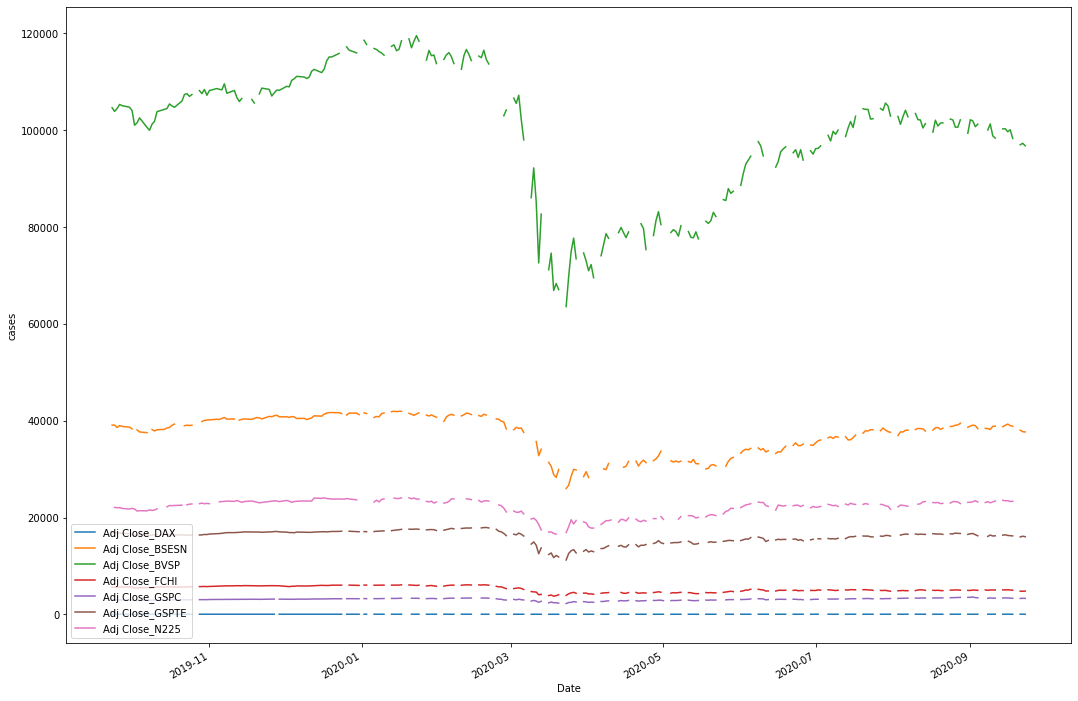

In [33]:
Indices_plot = df_combined_Indices.plot(figsize=(18,13))

Indices_plot.legend(loc=3, fontsize=10)
Indices_plot.set_ylabel('cases')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

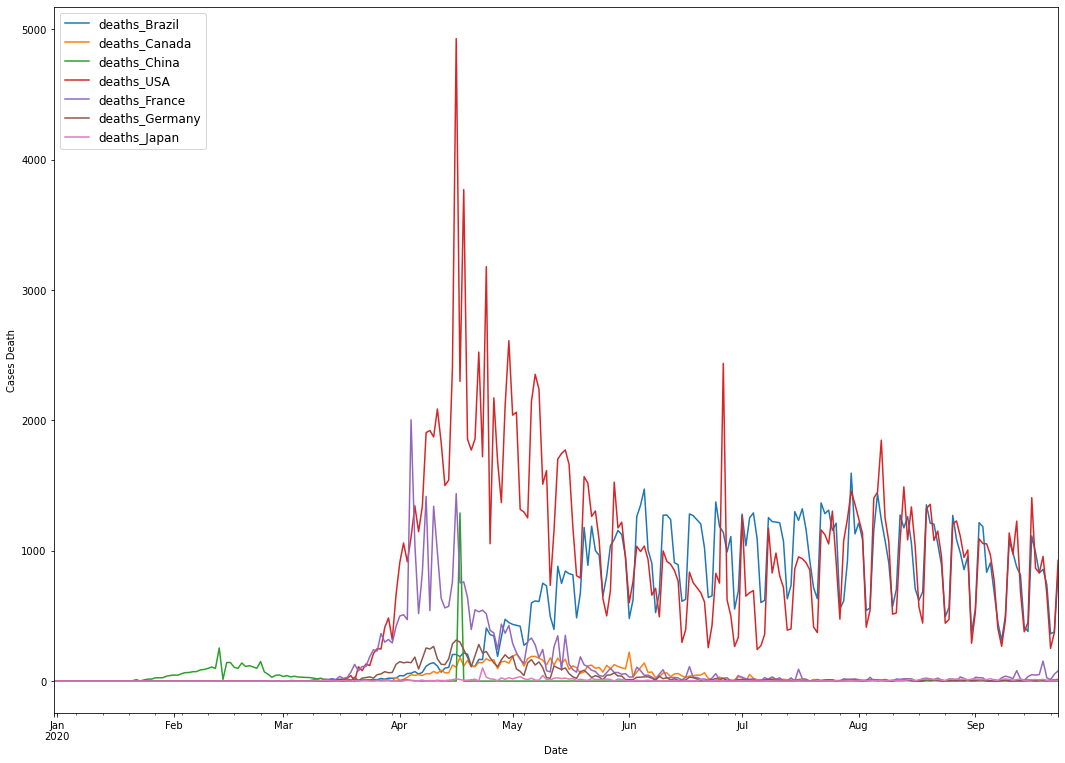

In [34]:

df_Death = df_combined_Covid[['deaths_Brazil','deaths_Canada', 'deaths_China','deaths_USA','deaths_France','deaths_Germany','deaths_Japan']]
Death_plot = df_Death.plot(figsize=(18,13))

Death_plot.legend(loc=2, fontsize=12)
Death_plot.set_ylabel('Cases Death')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

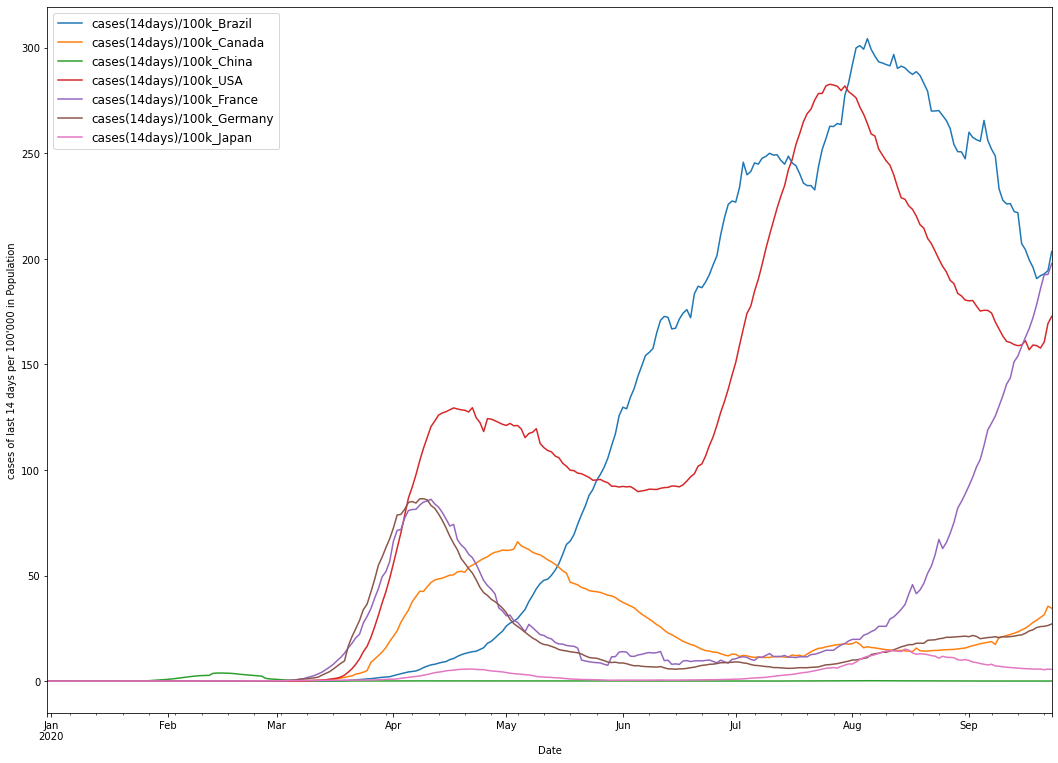

In [35]:
df_cumCases = df_combined_Covid[['cases(14days)/100k_Brazil','cases(14days)/100k_Canada', 'cases(14days)/100k_China','cases(14days)/100k_USA','cases(14days)/100k_France','cases(14days)/100k_Germany','cases(14days)/100k_Japan']]
cumCases_plot = df_cumCases.plot(figsize=(18,13))

cumCases_plot.legend(loc=2, fontsize=12)
cumCases_plot.set_ylabel('cases of last 14 days per 100\'000 in Population')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

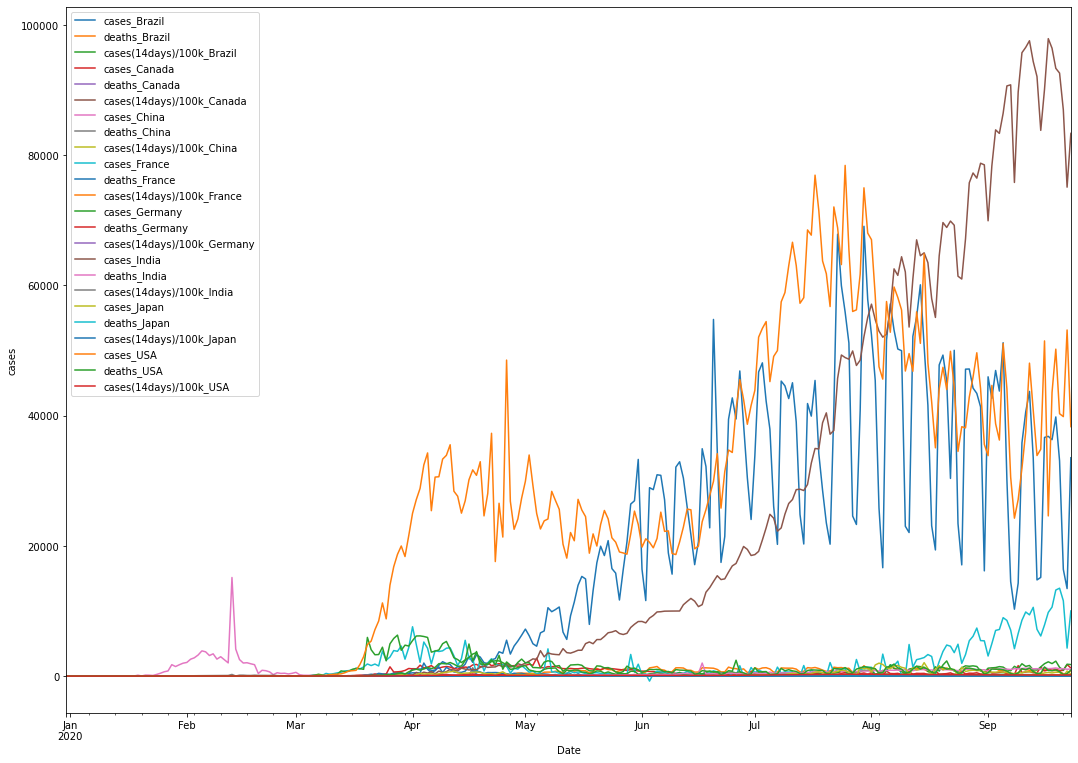

In [36]:
Covid_plot = df_combined_Covid.plot(figsize=(18,13))

Covid_plot.legend(loc=2, fontsize=10)
Covid_plot.set_ylabel('cases')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

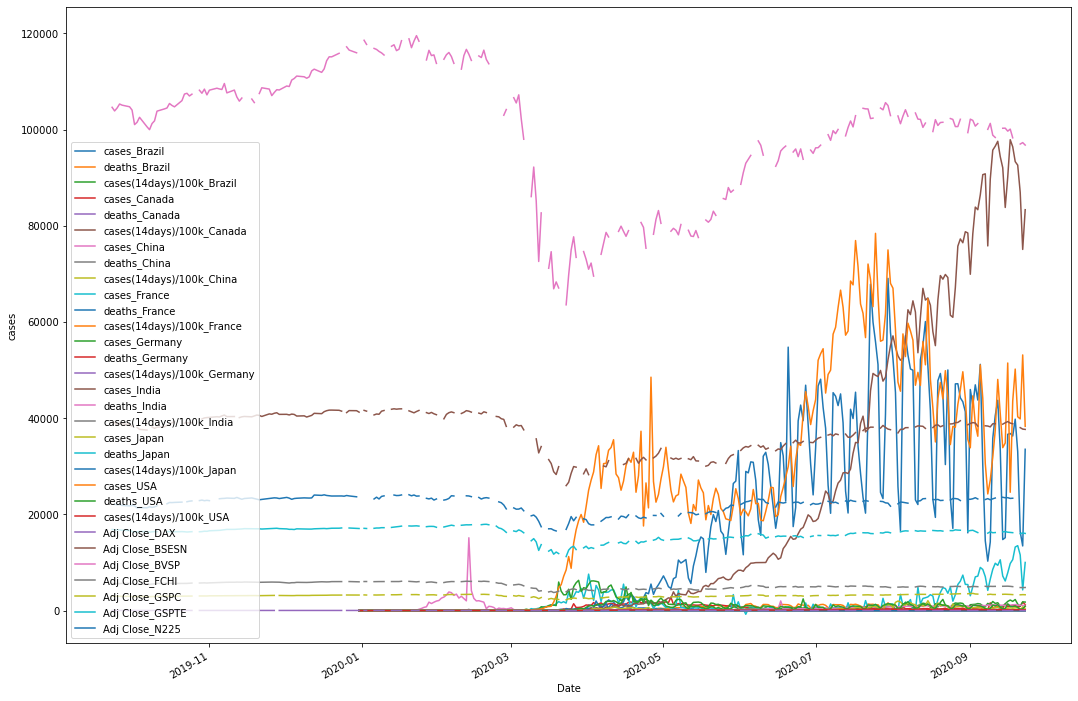

In [37]:
combined_plot = df_combined.plot(figsize=(18,13))

combined_plot.legend(loc=3, fontsize=10)
combined_plot.set_ylabel('cases')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()


In [38]:
##plt.hist(df_combined['cases_Brazil'], df_combined['Adj Close_BVSP'])
##plt.show()

## Correlations, etc.

In [39]:
df_combined.corr()

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,cases_USA,deaths_USA,cases(14days)/100k_USA,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
cases_Brazil,1.000000,0.910040,0.902446,-0.008450,-0.118628,0.054443,-0.219935,-0.174876,-0.306053,0.274915,...,0.819540,0.300077,0.801377,0.469007,0.095070,0.111789,-0.158693,0.438649,0.135241,0.361762
deaths_Brazil,0.910040,1.000000,0.821847,0.148838,0.140621,0.270314,-0.261945,-0.189236,-0.364065,0.166814,...,0.766290,0.418418,0.753718,0.331967,-0.089656,-0.031587,-0.256138,0.324223,0.033926,0.280912
cases(14days)/100k_Brazil,0.902446,0.821847,1.000000,-0.024830,-0.195946,0.015249,-0.231186,-0.184857,-0.320552,0.327352,...,0.841452,0.197129,0.877832,0.561486,0.152689,0.155067,-0.151497,0.524678,0.181445,0.430972
cases_Canada,-0.008450,0.148838,-0.024830,1.000000,0.752552,0.909708,-0.252629,-0.019269,-0.345746,0.307044,...,0.307426,0.734532,0.310224,-0.431281,-0.607145,-0.635802,-0.616310,-0.353939,-0.487582,-0.473017
deaths_Canada,-0.118628,0.140621,-0.195946,0.752552,1.000000,0.883529,-0.172050,0.062904,-0.235457,-0.092923,...,0.060226,0.664403,0.084196,-0.479074,-0.585859,-0.543914,-0.458877,-0.361285,-0.379016,-0.388424
cases(14days)/100k_Canada,0.054443,0.270314,0.015249,0.909708,0.883529,1.000000,-0.261417,-0.055349,-0.357758,0.190511,...,0.302234,0.792526,0.333292,-0.419511,-0.627334,-0.625233,-0.604395,-0.312753,-0.439397,-0.403349
cases_China,-0.219935,-0.261945,-0.231186,-0.252629,-0.172050,-0.261417,1.000000,0.284465,0.645013,-0.167658,...,-0.286134,-0.251100,-0.279566,0.158306,0.292719,0.316208,0.392618,0.193350,0.315751,0.219535
deaths_China,-0.174876,-0.189236,-0.184857,-0.019269,0.062904,-0.055349,0.284465,1.000000,0.331113,-0.070165,...,-0.152325,-0.024860,-0.149954,-0.034594,0.036062,0.028867,0.098693,0.002162,0.056987,-0.012094
cases(14days)/100k_China,-0.306053,-0.364065,-0.320552,-0.345746,-0.235457,-0.357758,0.645013,0.331113,1.000000,-0.228479,...,-0.399614,-0.342369,-0.388674,0.182037,0.391084,0.396915,0.524884,0.233601,0.434583,0.252295
cases_France,0.274915,0.166814,0.327352,0.307044,-0.092923,0.190511,-0.167658,-0.070165,-0.228479,1.000000,...,0.338717,0.224486,0.327264,0.098111,-0.052147,-0.197893,-0.294499,0.085281,-0.151902,-0.028118


In [40]:
#for calculation, try various solutions. 
# NaN as 0

df_combined_DropNA = df_combined.dropna()

df_combined_0 = df_combined.fillna(0)

df_combined_1e20 = df_combined.fillna(1e20)

In [41]:
df_combined_0.corr()

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,cases_USA,deaths_USA,cases(14days)/100k_USA,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
cases_Brazil,1.000000,0.923808,0.917443,0.153102,0.004855,0.208599,-0.150028,-0.123498,-0.207094,0.355846,...,0.848411,0.413452,0.833851,-0.088709,-0.113128,-0.125195,-0.203581,-0.095265,-0.147533,-0.109851
deaths_Brazil,0.923808,1.000000,0.852522,0.302497,0.245138,0.404422,-0.176215,-0.127810,-0.242845,0.271424,...,0.814168,0.524761,0.803757,-0.086817,-0.118809,-0.134780,-0.202700,-0.082243,-0.140572,-0.084451
cases(14days)/100k_Brazil,0.917443,0.852522,1.000000,0.146568,-0.057332,0.182904,-0.156400,-0.129693,-0.214849,0.404800,...,0.868936,0.333127,0.898376,-0.020960,-0.046478,-0.067827,-0.146197,-0.030117,-0.103701,-0.045354
cases_Canada,0.153102,0.302497,0.146568,1.000000,0.774472,0.925533,-0.172754,0.022502,-0.233275,0.389092,...,0.445155,0.780914,0.445427,-0.163131,-0.213555,-0.226354,-0.241378,-0.116995,-0.151849,-0.162385
deaths_Canada,0.004855,0.245138,-0.057332,0.774472,1.000000,0.887894,-0.125771,0.087400,-0.169876,-0.001447,...,0.187711,0.697556,0.206047,-0.161253,-0.184984,-0.205070,-0.200790,-0.112984,-0.128730,-0.136124
cases(14days)/100k_Canada,0.208599,0.404422,0.182904,0.925533,0.887894,1.000000,-0.178792,-0.009256,-0.241435,0.289343,...,0.443706,0.829437,0.466436,-0.181808,-0.228677,-0.244116,-0.264649,-0.133335,-0.174147,-0.173737
cases_China,-0.150028,-0.176215,-0.156400,-0.172754,-0.125771,-0.178792,1.000000,0.293393,0.652774,-0.119874,...,-0.184702,-0.170030,-0.181117,0.018507,0.046812,0.062870,0.054771,0.022156,0.031444,0.027561
deaths_China,-0.123498,-0.127810,-0.129693,0.022502,0.087400,-0.009256,0.293393,1.000000,0.341608,-0.038468,...,-0.086526,0.018027,-0.085785,-0.004174,0.008918,-0.004250,0.018355,0.008242,0.010972,0.001607
cases(14days)/100k_China,-0.207094,-0.242845,-0.214849,-0.233275,-0.169876,-0.241435,0.652774,0.341608,1.000000,-0.160933,...,-0.256200,-0.228414,-0.249698,-0.038280,-0.002646,-0.023816,0.026212,-0.032070,-0.018033,-0.029008
cases_France,0.355846,0.271424,0.404800,0.389092,-0.001447,0.289343,-0.119874,-0.038468,-0.160933,1.000000,...,0.425359,0.318376,0.414841,-0.108248,-0.124683,-0.156837,-0.184924,-0.101442,-0.139562,-0.107413


In [42]:
df_combined_1e20.corr()

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,cases_USA,deaths_USA,cases(14days)/100k_USA,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
cases_Brazil,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
deaths_Brazil,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
cases(14days)/100k_Brazil,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
cases_Canada,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
deaths_Canada,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
cases(14days)/100k_Canada,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
cases_China,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
deaths_China,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
cases(14days)/100k_China,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372
cases_France,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372


In [43]:
AdjClose=df_combined['Adj Close_DAX']
Cases  = df_combined['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

nan nan nan


C:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [44]:
AdjClose=df_combined_DropNA['Adj Close_DAX']
Cases  = df_combined_DropNA['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

-192.4532622428546 5953.426057055953 27.82784677866699


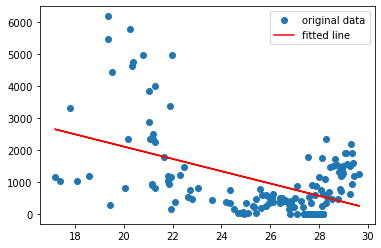

In [45]:
plt.plot(AdjClose, Cases, 'o', label='original data')

plt.plot(AdjClose, intercept + slope*AdjClose, 'r', label='fitted line')

plt.legend()

plt.show()

In [46]:
AdjClose=df_combined_1e20['Adj Close_DAX']
Cases  = df_combined_1e20['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

-0.23676982237685393 2.7165354330708656e+19 0.04947340293619927


In [47]:
AdjClose=df_combined_0['Adj Close_DAX']
Cases  = df_combined_0['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

-20.286460150281606 1203.629844631249 5.960851141601026


In [48]:
covariance = cov(df_combined['deaths_Brazil'], df_combined['cases_Brazil'])
covariance

array([[nan, nan],
       [nan, nan]])

In [49]:
covariance_DropNA = cov(df_combined_DropNA['deaths_Brazil'], df_combined_DropNA['cases_Brazil'])
covariance_DropNA

array([[2.55105476e+05, 8.47080972e+06],
       [8.47080972e+06, 3.41575370e+08]])

In [50]:
covariance_0 = cov(df_combined_0['deaths_Brazil'], df_combined['cases_Brazil'])
covariance_0

array([[235219.2460177,            nan],
       [           nan,            nan]])

In [51]:
df_combined_DropNA.corr()

,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,cases_Canada,deaths_Canada,cases(14days)/100k_Canada,cases_China,deaths_China,cases(14days)/100k_China,cases_France,...,cases_USA,deaths_USA,cases(14days)/100k_USA,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
cases_Brazil,1.000000,0.907448,0.886357,0.026156,-0.104512,0.082118,-0.226698,-0.159852,-0.300416,0.289342,...,0.810389,0.332120,0.794016,0.475611,0.129337,0.107286,-0.148397,0.450577,0.154196,0.352670
deaths_Brazil,0.907448,1.000000,0.793039,0.175775,0.156479,0.304810,-0.264566,-0.164645,-0.354081,0.183850,...,0.743714,0.436355,0.729096,0.335805,-0.056090,-0.039350,-0.244729,0.329947,0.047441,0.269027
cases(14days)/100k_Brazil,0.886357,0.793039,1.000000,0.019040,-0.189460,0.035703,-0.243769,-0.174424,-0.322957,0.337943,...,0.845626,0.195713,0.890094,0.569953,0.190244,0.153962,-0.131240,0.530064,0.197813,0.424629
cases_Canada,0.026156,0.175775,0.019040,1.000000,0.706790,0.880886,-0.255277,0.081698,-0.340869,0.372540,...,0.300202,0.705335,0.318597,-0.403380,-0.599784,-0.633333,-0.601539,-0.328872,-0.473928,-0.422283
deaths_Canada,-0.104512,0.156479,-0.189460,0.706790,1.000000,0.870214,-0.157620,0.158807,-0.215259,-0.084094,...,0.025902,0.630981,0.055561,-0.459763,-0.556955,-0.537385,-0.439560,-0.344179,-0.365225,-0.373052
cases(14days)/100k_Canada,0.082118,0.304810,0.035703,0.880886,0.870214,1.000000,-0.257143,0.032522,-0.344380,0.202420,...,0.269915,0.771696,0.312637,-0.384159,-0.599993,-0.612593,-0.578231,-0.279800,-0.412270,-0.357304
cases_China,-0.226698,-0.264566,-0.243769,-0.255277,-0.157620,-0.257143,1.000000,0.235931,0.701206,-0.175203,...,-0.284894,-0.235282,-0.281511,0.151527,0.301673,0.320781,0.409407,0.187322,0.324907,0.212422
deaths_China,-0.159852,-0.164645,-0.174424,0.081698,0.158807,0.032522,0.235931,1.000000,0.224632,-0.037986,...,-0.096308,0.059909,-0.100135,-0.058235,0.012868,0.004841,0.063386,-0.020422,0.025556,-0.034635
cases(14days)/100k_China,-0.300416,-0.354081,-0.322957,-0.340869,-0.215259,-0.344380,0.701206,0.224632,1.000000,-0.229367,...,-0.380854,-0.309646,-0.373302,0.171595,0.382793,0.394047,0.513856,0.224992,0.416652,0.233236
cases_France,0.289342,0.183850,0.337943,0.372540,-0.084094,0.202420,-0.175203,-0.037986,-0.229367,1.000000,...,0.321052,0.254732,0.353695,0.122652,-0.043778,-0.192354,-0.284557,0.110046,-0.129377,-0.006012


In [52]:
covariance_1e20 = cov(df_combined_1e20['deaths_Brazil'], df_combined['cases_Brazil'])
covariance_1e20

array([[1.67412806e+39,            nan],
       [           nan,            nan]])

In [53]:
x_values = df_combined['cases(14days)/100k_Germany']

y_values = df_combined['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

nan


In [54]:
x_values = df_combined_DropNA['cases(14days)/100k_Germany']

y_values = df_combined_DropNA['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.2413705701067148


In [55]:
x_values = df_combined_0['cases(14days)/100k_Germany']

y_values = df_combined_0['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2

print(r_squared)

0.0345866988415995


In [56]:
x_values = df_combined_1e20['cases(14days)/100k_Germany']

y_values = df_combined_1e20['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.06346255811220396


## Countries: Germany

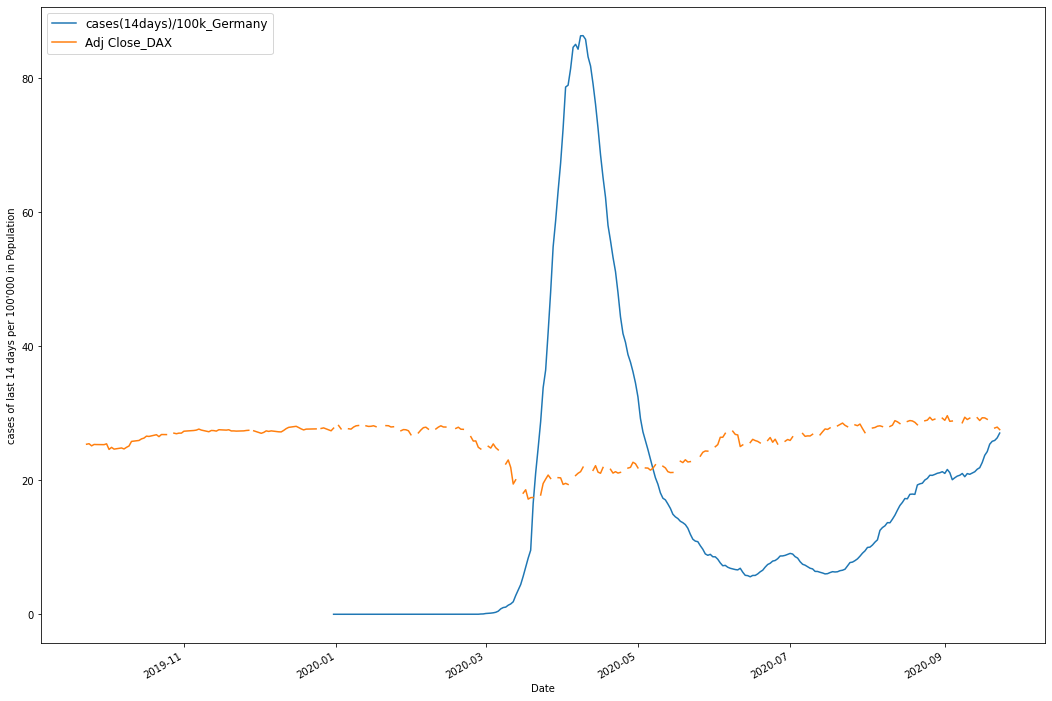

In [57]:
df_Germany_Overview = df_combined[['cases(14days)/100k_Germany','Adj Close_DAX']]
Germany_Overview_plot = df_Germany_Overview.plot(figsize=(18,13))

Germany_Overview_plot.legend(loc=2, fontsize=12)
Germany_Overview_plot.set_ylabel('cases of last 14 days per 100\'000 in Population')
#Germany_Overview_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

In [58]:
df_Covid_Germany

,Date,cases_Germany,deaths_Germany,cases(14days)/100k_Germany
15812,2020-09-23,1769,13,27.045547
15813,2020-09-22,1821,10,26.331254
15814,2020-09-21,922,0,25.943392
15815,2020-09-20,1345,2,25.813302
15816,2020-09-19,2297,6,25.383281
...,...,...,...,...
16075,2020-01-04,0,0,0.000000
16076,2020-01-03,0,0,0.000000
16077,2020-01-02,0,0,0.000000
16078,2020-01-01,0,0,0.000000


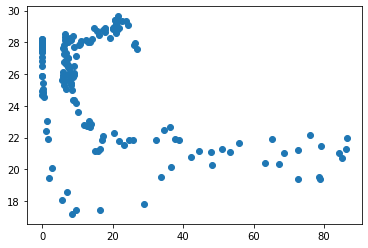

In [59]:
#df_combined['deaths_Brazil'].plot()
#df_combined['Adj Close_BVSP'].plot()
#df_combined['Volume_BVSP'].plot()
#plt.show()



plt.scatter(df_combined['cases(14days)/100k_Germany'], df_combined['Adj Close_DAX'])


plt.show()

In [60]:
#df_Covid_Germany.fillna(0)
##df_Covid_Germany.fillna(0)
#df_DAX

df_Germany = pd.merge(df_Covid_Germany, df_DAX, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_Germany.sort_index()
df_Germany.head(3)

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-09-23,1769.0,13.0,27.045547,27.559999
2020-09-22,1821.0,10.0,26.331254,27.934000
2020-09-21,922.0,0.0,25.943392,27.799999


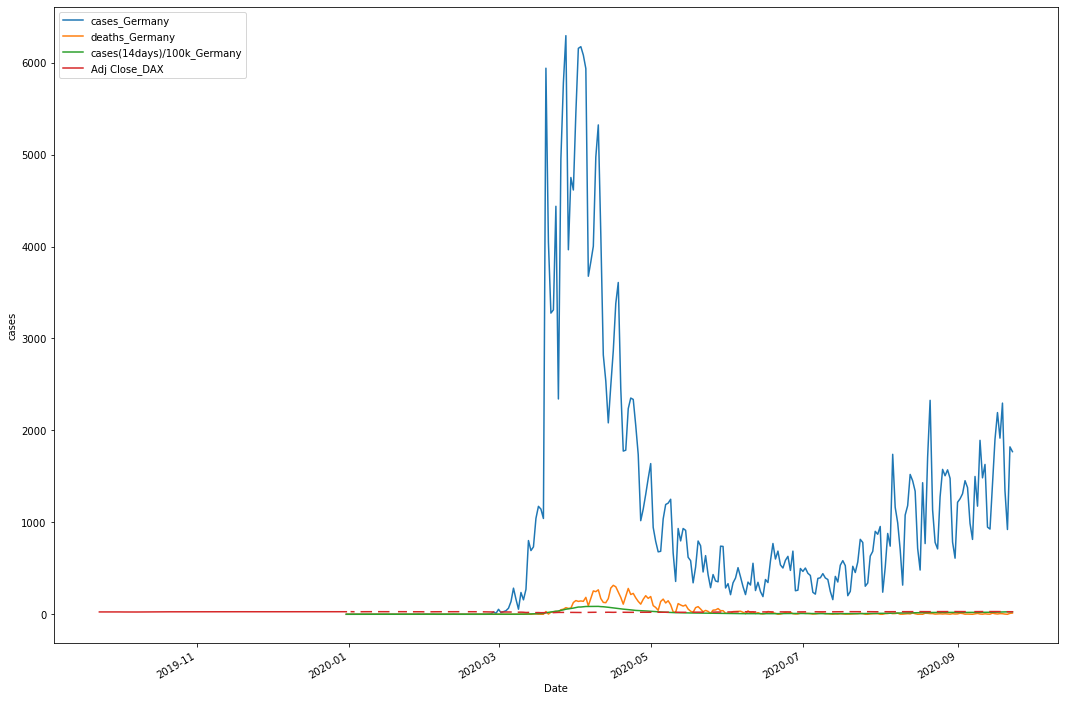

In [61]:

Germany_plot = df_Germany.plot(figsize=(18,13))

Germany_plot.legend(loc=2, fontsize=10)
Germany_plot.set_ylabel('cases')
#combined_plot.right.combined_plot.set_ylabel('Stockmarket Index')

plt.show()

In [62]:
#### Einschub USA
#df_USA_Overview = df_combined[['cases(14days)/100k_USA','Adj Close_GSPC']]
#USA_Overview_plot = df_USA_Overview.plot(figsize=(18,13))

#USA_Overview_plot.legend(loc=2, fontsize=12)
#USA_Overview_plot.set_ylabel('cases of last 14 days per 100\'000 in Population')


#plt.show()

In [63]:
print(df_Covid_Germany.head(3))
print(df_DAX.head(3))
print(df_Germany.head(3))

            Date  cases_Germany  deaths_Germany  cases(14days)/100k_Germany
15812 2020-09-23           1769              13                   27.045547
15813 2020-09-22           1821              10                   26.331254
15814 2020-09-21            922               0                   25.943392
        Date  Adj Close_DAX
0 2019-09-23      25.380625
1 2019-09-24      25.453772
2 2019-09-25      25.137453
            cases_Germany  deaths_Germany  cases(14days)/100k_Germany  \
Date                                                                    
2020-09-23         1769.0            13.0                   27.045547   
2020-09-22         1821.0            10.0                   26.331254   
2020-09-21          922.0             0.0                   25.943392   

            Adj Close_DAX  
Date                       
2020-09-23      27.559999  
2020-09-22      27.934000  
2020-09-21      27.799999  


In [64]:
df_Germany_DropNA= df_Germany.dropna()
df_Germany_DropNA.sort_index()

df_Germany_0= df_Germany.fillna(0)
df_Germany_0.sort_index()

df_Germany_1e20 = df_Germany.fillna(1e20)
df_Germany_DropNA.sort_index()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2019-12-31,0.0,0.0,0.000000,27.782667
2020-01-02,0.0,0.0,0.000000,28.175140
2020-01-03,0.0,0.0,0.000000,27.670954
2020-01-06,0.0,0.0,0.000000,27.685783
2020-01-07,0.0,0.0,0.000000,27.636353
...,...,...,...,...
2020-09-17,2194.0,3.0,23.718606,29.309999
2020-09-18,1916.0,7.0,24.276308,29.101999
2020-09-21,922.0,0.0,25.943392,27.799999


In [65]:
df_Germany_0 # note: last two columns are very close in absolute numbers.

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-09-23,1769.0,13.0,27.045547,27.559999
2020-09-22,1821.0,10.0,26.331254,27.934000
2020-09-21,922.0,0.0,25.943392,27.799999
2020-09-20,1345.0,2.0,25.813302,0.000000
2020-09-19,2297.0,6.0,25.383281,0.000000
...,...,...,...,...
2019-12-23,0.0,0.0,0.000000,27.668003
2019-12-24,0.0,0.0,0.000000,27.668003
2019-12-26,0.0,0.0,0.000000,27.732258


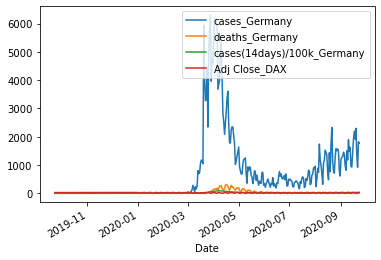

In [66]:
df_Germany_0.plot()

In [67]:
#df_Germany_0.cov()

In [68]:
df_Germany_adj = df_Germany
df_Germany_cases = df_Germany_adj.pop('cases_Germany')

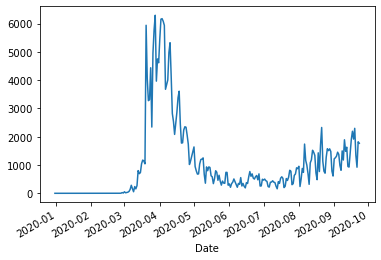

In [69]:
df_Germany_cases.plot()

Text(0, 0.5, 'Cases')

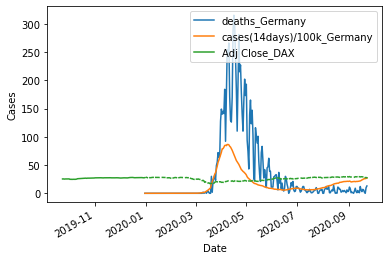

In [70]:
plot_Germany = df_Germany.plot()
plot_Germany.set_xlabel("Date")
plot_Germany.set_ylabel("Cases")

In [71]:
df_Germany.corr()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
deaths_Germany,1.000000,0.802441,-0.595317
cases(14days)/100k_Germany,0.802441,1.000000,-0.520779
Adj Close_DAX,-0.595317,-0.520779,1.000000


In [72]:
df_Germany_DropNA.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.549419,0.839927,-0.528018
deaths_Germany,0.549419,1.000000,0.785918,-0.595317
cases(14days)/100k_Germany,0.839927,0.785918,1.000000,-0.520779
Adj Close_DAX,-0.528018,-0.595317,-0.520779,1.000000


In [73]:
x_values = df_Germany['cases(14days)/100k_Germany']

y_values = df_Germany['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

nan


In [74]:
df_Germany_DropNA.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.549419,0.839927,-0.528018
deaths_Germany,0.549419,1.000000,0.785918,-0.595317
cases(14days)/100k_Germany,0.839927,0.785918,1.000000,-0.520779
Adj Close_DAX,-0.528018,-0.595317,-0.520779,1.000000


In [75]:
x_values = df_Germany_DropNA['Adj Close_DAX']

y_values = df_Germany_DropNA['cases(14days)/100k_Germany']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.27121040946478703


### Germany - by month

In [76]:
df_Germany_DropNA.sort_index()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2019-12-31,0.0,0.0,0.000000,27.782667
2020-01-02,0.0,0.0,0.000000,28.175140
2020-01-03,0.0,0.0,0.000000,27.670954
2020-01-06,0.0,0.0,0.000000,27.685783
2020-01-07,0.0,0.0,0.000000,27.636353
...,...,...,...,...
2020-09-17,2194.0,3.0,23.718606,29.309999
2020-09-18,1916.0,7.0,24.276308,29.101999
2020-09-21,922.0,0.0,25.943392,27.799999


In [77]:
df_Germany.sort_index()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,
2019-09-23,NaN,NaN,25.380625
2019-09-24,NaN,NaN,25.453772
2019-09-25,NaN,NaN,25.137453
2019-09-26,NaN,NaN,25.345037
2019-09-27,NaN,NaN,25.330210
...,...,...,...
2020-09-19,6.0,25.383281,NaN
2020-09-20,2.0,25.813302,NaN
2020-09-21,0.0,25.943392,27.799999


In [78]:
df_Germany.corr()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
deaths_Germany,1.000000,0.802441,-0.595317
cases(14days)/100k_Germany,0.802441,1.000000,-0.520779
Adj Close_DAX,-0.595317,-0.520779,1.000000


In [79]:
df_Germany_DropNA.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.549419,0.839927,-0.528018
deaths_Germany,0.549419,1.000000,0.785918,-0.595317
cases(14days)/100k_Germany,0.839927,0.785918,1.000000,-0.520779
Adj Close_DAX,-0.528018,-0.595317,-0.520779,1.000000


In [80]:
subset_Germany_sep2020 = df_Germany.sort_index()[0:24]
subset_Germany_aug2020 = df_Germany[24:54]
subset_Germany_juli2020 = df_Germany[54:85]
subset_Germany_juni2020 = df_Germany[85:115]
subset_Germany_mai2020 = df_Germany[115:146]
subset_Germany_april2020 = df_Germany[146:176]
subset_Germany_märz2020 = df_Germany[176:207]
subset_Germany_feb2020 = df_Germany[207:236]
subset_Germany_jan2020 = df_Germany[236:267]
subset_Germany_dez2019 = df_Germany[267:298]


In [81]:
subset_Germany_dez2019.corr()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
deaths_Germany,NaN,NaN,NaN
cases(14days)/100k_Germany,NaN,NaN,NaN
Adj Close_DAX,NaN,NaN,1.0


In [82]:
subset_Germany_sep2020.corr()

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
deaths_Germany,NaN,NaN,NaN
cases(14days)/100k_Germany,NaN,NaN,NaN
Adj Close_DAX,NaN,NaN,1.0


In [83]:
subset_Germany_april2020 = df_Germany[146:176]

In [84]:
subset_Germany_april2020

,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,
2020-04-30,173.0,34.532970,22.470911
2020-04-29,202.0,36.204872,22.688404
2020-04-28,163.0,37.628639,21.929157
2020-04-27,110.0,38.758498,21.816458
2020-04-26,140.0,40.588195,NaN
2020-04-25,179.0,41.893917,NaN
2020-04-24,227.0,44.396952,21.179796
2020-04-23,215.0,47.993710,21.073029
2020-04-22,281.0,51.152015,21.283600


In [85]:
df_Germany_DropNA.head(3)

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-09-23,1769.0,13.0,27.045547,27.559999
2020-09-22,1821.0,10.0,26.331254,27.934000
2020-09-21,922.0,0.0,25.943392,27.799999


In [86]:
df_Germany_DropNA.sort_index()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2019-12-31,0.0,0.0,0.000000,27.782667
2020-01-02,0.0,0.0,0.000000,28.175140
2020-01-03,0.0,0.0,0.000000,27.670954
2020-01-06,0.0,0.0,0.000000,27.685783
2020-01-07,0.0,0.0,0.000000,27.636353
...,...,...,...,...
2020-09-17,2194.0,3.0,23.718606,29.309999
2020-09-18,1916.0,7.0,24.276308,29.101999
2020-09-21,922.0,0.0,25.943392,27.799999


In [87]:
df_Germany_DropNA_1=df_Germany_DropNA[0:30]
df_Germany_DropNA_2=df_Germany_DropNA[30:60]
df_Germany_DropNA_3=df_Germany_DropNA[60:90]
df_Germany_DropNA_4=df_Germany_DropNA[90:120]
df_Germany_DropNA_5=df_Germany_DropNA[120:150]
df_Germany_DropNA_6=df_Germany_DropNA[150:180]


In [88]:
df_Germany_DropNA_1

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
Date,,,,
2020-09-23,1769.0,13.0,27.045547,27.559999
2020-09-22,1821.0,10.0,26.331254,27.934000
2020-09-21,922.0,0.0,25.943392,27.799999
2020-09-18,1916.0,7.0,24.276308,29.101999
2020-09-17,2194.0,3.0,23.718606,29.309999
2020-09-16,1901.0,6.0,22.654997,29.330000
2020-09-15,1407.0,12.0,21.878068,28.920000
2020-09-14,927.0,1.0,21.650410,29.329000
2020-09-11,1484.0,1.0,20.890345,29.280001


In [89]:
df_Germany_DropNA_1.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.213494,0.268707,-0.123175
deaths_Germany,0.213494,1.000000,0.056861,-0.254621
cases(14days)/100k_Germany,0.268707,0.056861,1.000000,-0.258962
Adj Close_DAX,-0.123175,-0.254621,-0.258962,1.000000


In [90]:
AdjClose1=df_Germany_DropNA_1['Adj Close_DAX']
Cases1  = df_Germany_DropNA_1['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose1, Cases1)
print (slope, intercept, std_err, r_value)

#covariance = cov(df_Germany_DropNA_1['cases(14days)/100k_Germany'], df_Germany_DropNA_1['Adj Close_DAX'])

-1.5769199497828366 66.24194624959185 1.1115300320513741 -0.2589619668438565


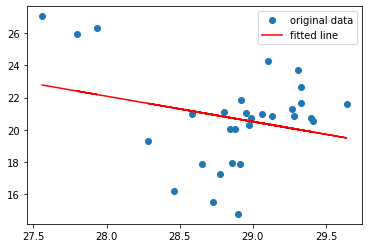

In [91]:
plt.plot(AdjClose1, Cases1, 'o', label='original data')

plt.plot(AdjClose1, intercept + slope*AdjClose1, 'r', label='fitted line')

plt.legend()

plt.show()

In [92]:
df_Germany_DropNA_2.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.247851,0.630270,0.350482
deaths_Germany,0.247851,1.000000,0.106555,-0.492142
cases(14days)/100k_Germany,0.630270,0.106555,1.000000,0.217044
Adj Close_DAX,0.350482,-0.492142,0.217044,1.000000


In [93]:
AdjClose2=df_Germany_DropNA_2['Adj Close_DAX']
Cases2  = df_Germany_DropNA_2['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose2, Cases2)
print (slope, intercept, std_err, r_value)


0.6989892299931458 -10.726515509551499 0.5941067534045734 0.21704448232977452


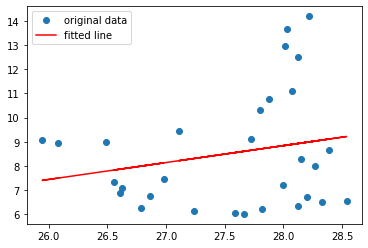

In [94]:
plt.plot(AdjClose2, Cases2, 'o', label='original data')

plt.plot(AdjClose2, intercept + slope*AdjClose2, 'r', label='fitted line')

plt.legend()

plt.show()

In [95]:
df_Germany_DropNA_3.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.438524,0.310585,-0.332610
deaths_Germany,0.438524,1.000000,0.637054,-0.616861
cases(14days)/100k_Germany,0.310585,0.637054,1.000000,-0.868281
Adj Close_DAX,-0.332610,-0.616861,-0.868281,1.000000


In [96]:
AdjClose3=df_Germany_DropNA_3['Adj Close_DAX']
Cases3  = df_Germany_DropNA_3['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose3, Cases3)
print (slope, intercept, std_err, r_value)


-1.5362558508189974 47.17617549891279 0.1658707423327177 -0.8682808815363561


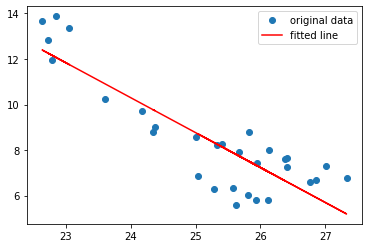

In [97]:
plt.plot(AdjClose3, Cases3, 'o', label='original data')

plt.plot(AdjClose3, intercept + slope*AdjClose3, 'r', label='fitted line')

plt.legend()

plt.show()

In [98]:
df_Germany_DropNA_4.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.476270,0.860031,-0.575321
deaths_Germany,0.476270,1.000000,0.505774,-0.066993
cases(14days)/100k_Germany,0.860031,0.505774,1.000000,-0.384140
Adj Close_DAX,-0.575321,-0.066993,-0.384140,1.000000


In [99]:
AdjClose4=df_Germany_DropNA_4['Adj Close_DAX']
Cases4  = df_Germany_DropNA_4['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose4, Cases4)
print (slope, intercept, std_err, r_value)


-15.459073571167863 379.9568908832563 7.021761740990542 -0.38413987615658485


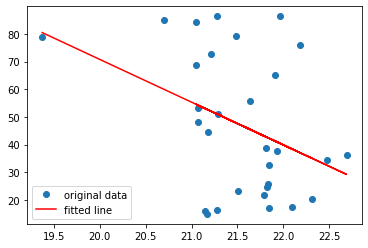

In [100]:
plt.plot(AdjClose4, Cases4, 'o', label='original data')

plt.plot(AdjClose4, intercept + slope*AdjClose4, 'r', label='fitted line')

plt.legend()

plt.show()

In [101]:
df_Germany_DropNA_5.corr()

,cases_Germany,deaths_Germany,cases(14days)/100k_Germany,Adj Close_DAX
cases_Germany,1.000000,0.818713,0.895656,-0.599920
deaths_Germany,0.818713,1.000000,0.945218,-0.364880
cases(14days)/100k_Germany,0.895656,0.945218,1.000000,-0.473366
Adj Close_DAX,-0.599920,-0.364880,-0.473366,1.000000


In [102]:
AdjClose5=df_Germany_DropNA_5['Adj Close_DAX']
Cases5  = df_Germany_DropNA_5['cases(14days)/100k_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose5, Cases5)
print (slope, intercept, std_err, r_value)


-3.7704070581063034 99.78505924258202 1.3259330376865373 -0.4733662875885516


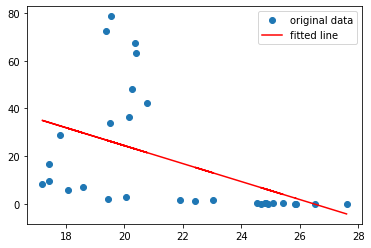

In [103]:
plt.plot(AdjClose5, Cases5, 'o', label='original data')

plt.plot(AdjClose5, intercept + slope*AdjClose5, 'r', label='fitted line')

plt.legend()

plt.show()

In [105]:
#Germany_Idea 
#Adj_Closes= [AdjClose1, AdjClose2, AdjClose3, AdjClose4, AdjClose5]
#Cases = [Cases1, Cases2, Cases3, Cases4, Cases5]
#slope, intercept, r_value, p_value, std_err = stats.linregress(Adj_Closes, Cases)
#print (slope, intercept, std_err)


ValueError: too many values to unpack (expected 4)

In [ ]:
#df_Covid_Germany = df_Covid19[df_Covid19['countriesAndTerritories'].isin(['Germany'])]
#pd.set_option('display.max_rows', None)
#df_Covid_Germany